In [1]:
import seaborn as sns
import sys
sys.path.append('..')

from software.data_collector import get_data_for_period
from software.data_processor import process_data
from software.plotter import plot_bollinger_bands, plot_ema_and_sma, plot_rsi, plot_atr, plot_signals
from software.strategy_buy import Strategy

%matplotlib inline
sns.set_style('darkgrid')

ticker = "BTC-USD"
start_date = "2024-11-30 8:00:00"
end_date = "2024-11-30 15:30:00"
interval = "1m"

sma_period=5
ema_period=20
rsi_period=7
bbands_period=20
atr_period=14

initial_cash = 3000
transaction_cost = 0.001
leverage=1
slippage_pct=0.0005
risk_per_trade=0.02

data = get_data_for_period(ticker=ticker, start_date=start_date, end_date=end_date, interval=interval)
processed_data = process_data(
    data,
    sma_period=sma_period,
    ema_period=ema_period,
    rsi_period=rsi_period,
    bbands_period=bbands_period,
    atr_period=atr_period,
)

strategy = Strategy(
    ema_sma_threshold=0,
    rsi_long_threshold=40,
    rsi_short_threshold=60,
    bb_threshold=0,
)


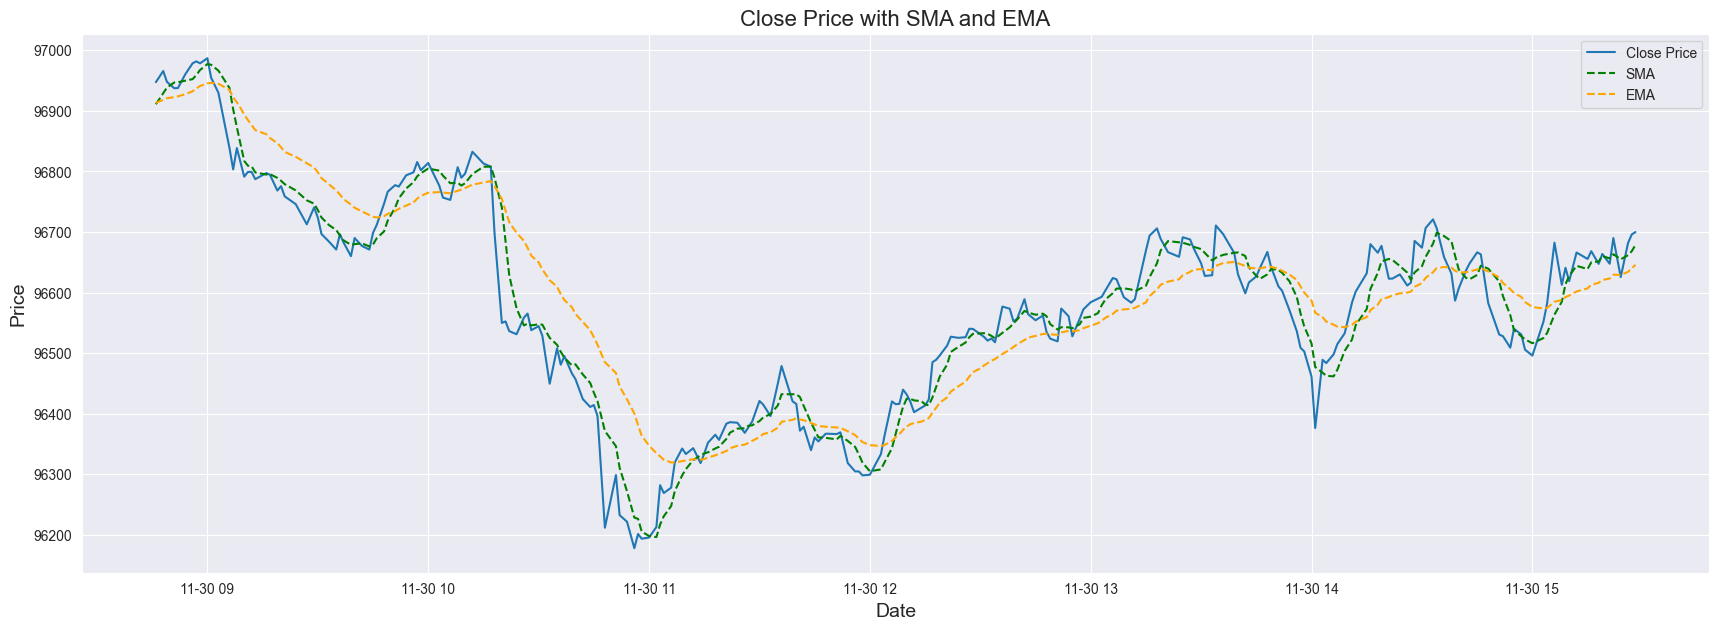

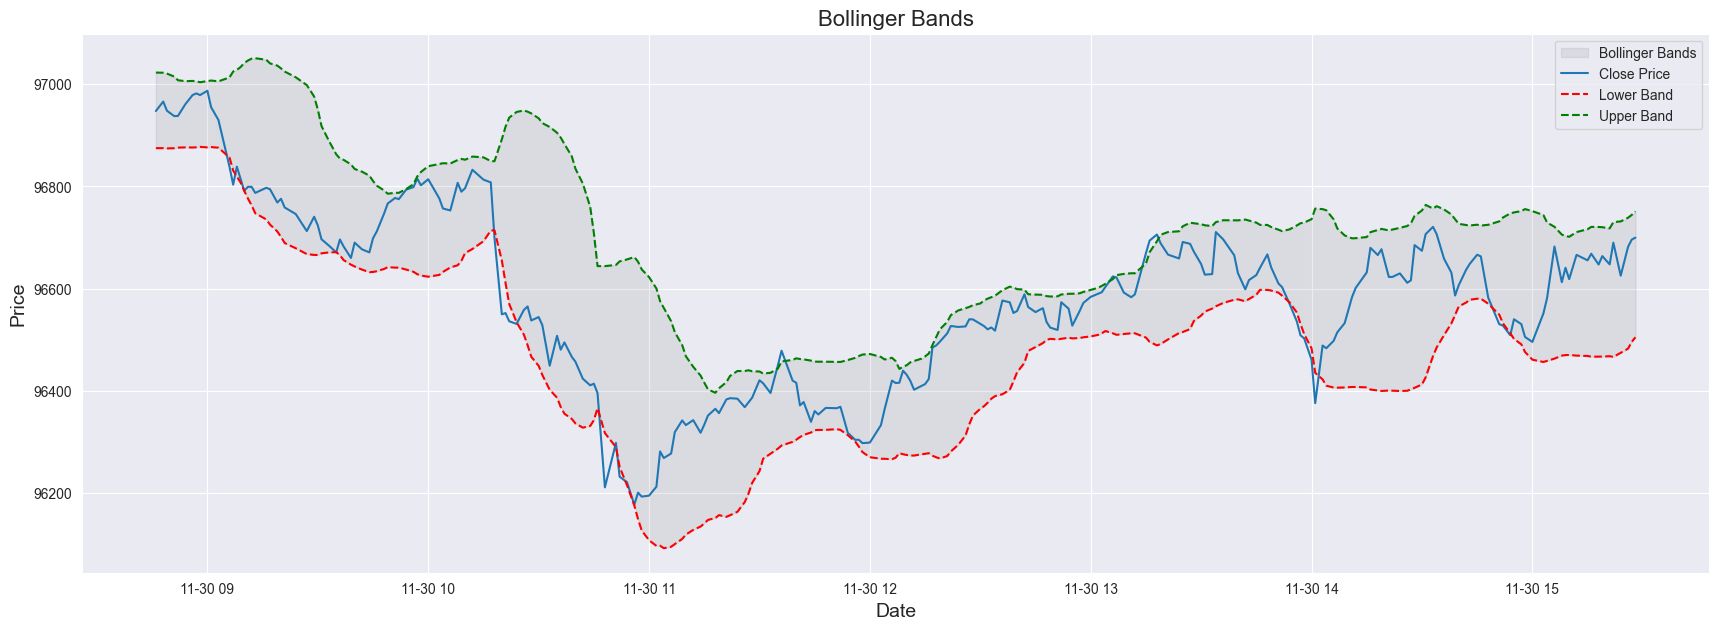

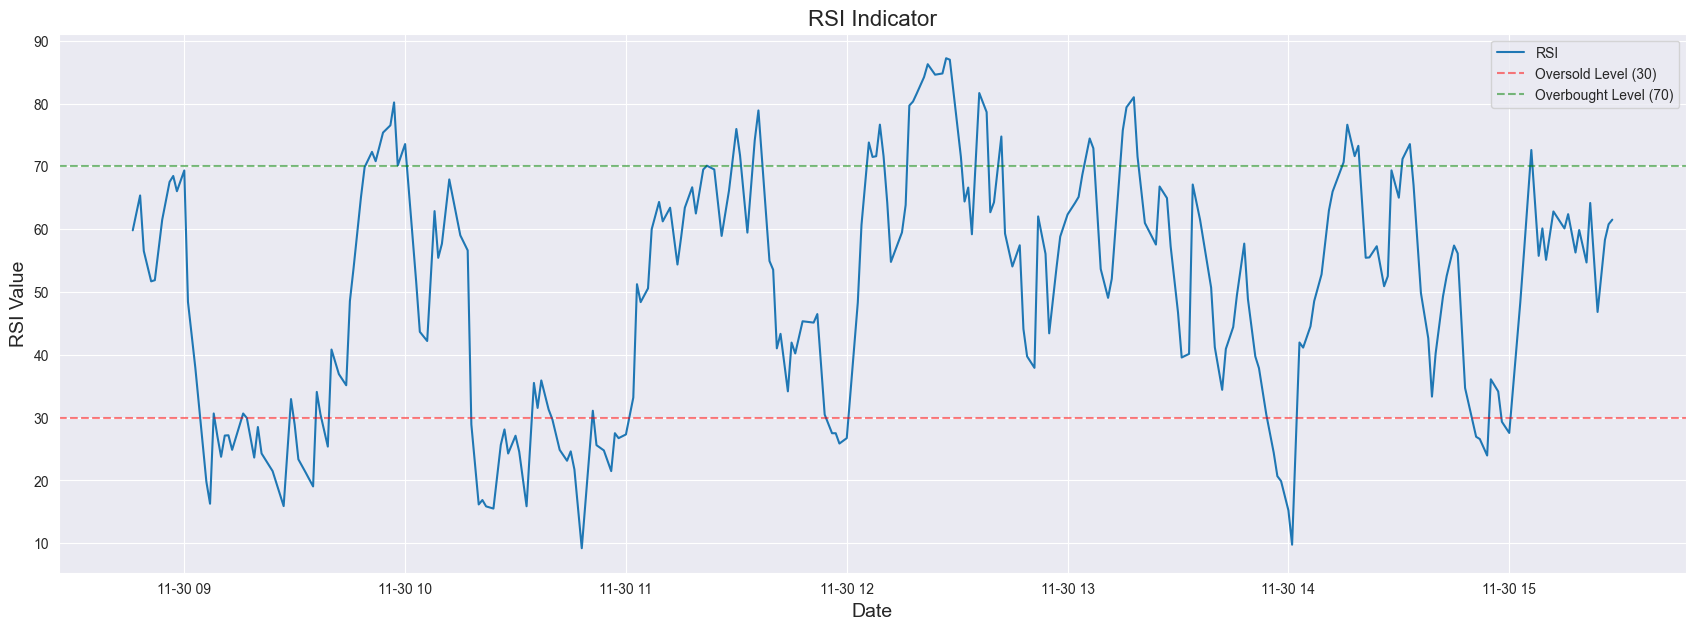

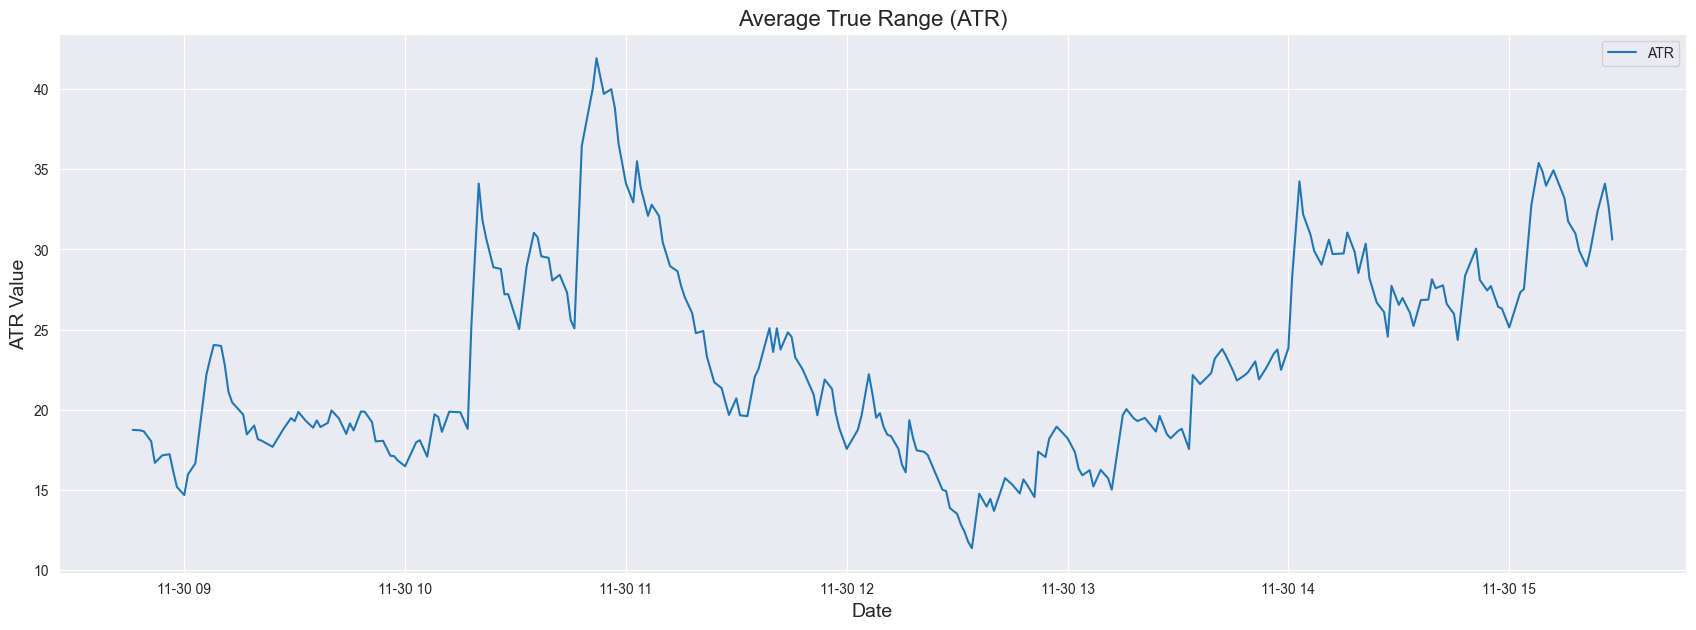

In [2]:
plot_ema_and_sma(processed_data)
plot_bollinger_bands(processed_data)
plot_rsi(processed_data)
plot_atr(processed_data)

In [3]:
data_with_signals = strategy.generate_buy_signals(processed_data)

Signals : [0, -1, 0, 0, 0, -1, -1, -1, -1, -1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, -1, -1, -1, -1, -1, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, -1, 0, -1, -1, -1, 0, 0, 0, -1, 0, 0, -1, -1]


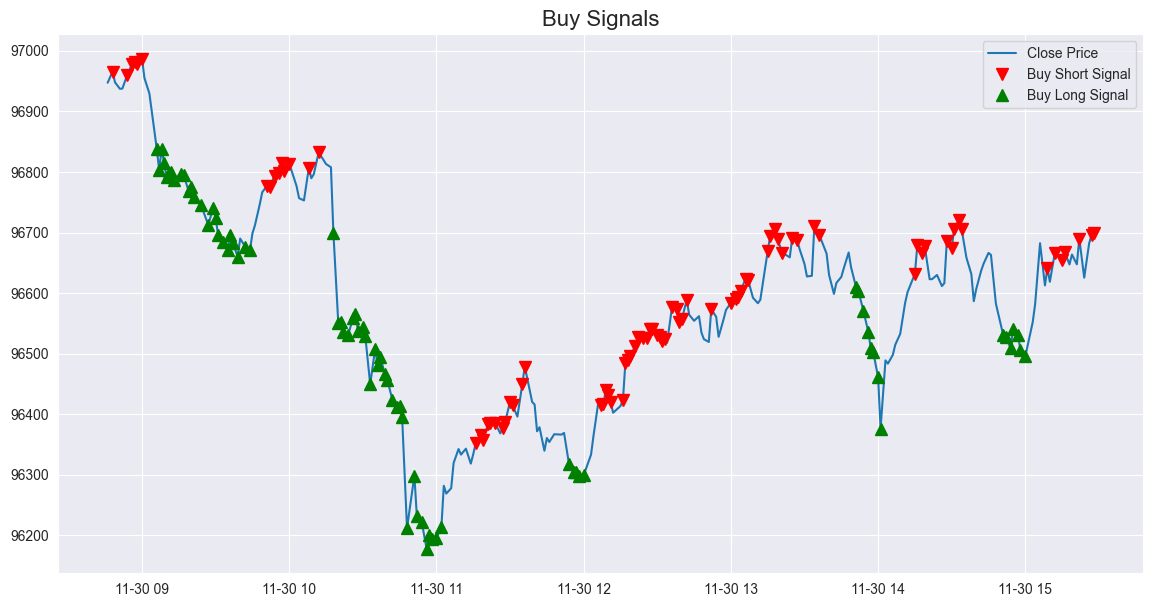

In [4]:
print("Signals :", data_with_signals["Signal"].tolist())
plot_signals(processed_data)

In [5]:
from software.tasks import execute_trades

transactions = execute_trades(
    data_with_signals,
    initial_cash,
    transaction_cost,
    leverage,
    slippage_pct,
    risk_per_trade,
)

Executing trades: 100%|██████████| 260/260 [00:00<00:00, 8838.06it/s]

Opening short position at 96965.90625 stop loss at 97003.35967590817 ...
Position size adjusted to max allowable size: 3000
Opened short position at $96917.42 with a stop loss at $97003.36
Calculating trailing stop for  short  position at  96948.0234375
Updated stop loss for  short  position at  96948.0234375  and new stop loss at  97003.35967590817
Calculating trailing stop for  short  position at  96937.4296875
Updated stop loss for  short  position at  96937.4296875  and new stop loss at  97003.35967590817
Calculating trailing stop for  short  position at  96937.84375
Updated stop loss for  short  position at  96937.84375  and new stop loss at  97003.35967590817
Calculating trailing stop for  short  position at  96960.671875
Updated stop loss for  short  position at  96960.671875  and new stop loss at  97003.35967590817
Calculating trailing stop for  short  position at  96978.828125
Updated stop loss for  short  position at  96978.828125  and new stop loss at  97003.35967590817
Calc

In [6]:
transactions

[{'action': 'open',
  'position_type': 'short',
  'price': 96917.423296875,
  'date': Timestamp('2024-11-30 08:48:00+0000', tz='UTC')},
 {'action': 'close',
  'position_type': 'short',
  'price': 96650.36158203126,
  'date': Timestamp('2024-11-30 09:45:00+0000', tz='UTC'),
  'pnl': 8.266678139771267},
 {'action': 'open',
  'position_type': 'short',
  'price': 96729.11125,
  'date': Timestamp('2024-11-30 09:51:00+0000', tz='UTC')},
 {'action': 'close',
  'position_type': 'short',
  'price': 96784.17745312501,
  'date': Timestamp('2024-11-30 10:12:00+0000', tz='UTC'),
  'pnl': -1.7125539748267333},
 {'action': 'open',
  'position_type': 'long',
  'price': 96747.71687109374,
  'date': Timestamp('2024-11-30 10:18:00+0000', tz='UTC')},
 {'action': 'close',
  'position_type': 'long',
  'price': 96598.2593671875,
  'date': Timestamp('2024-11-30 10:20:00+0000', tz='UTC'),
  'pnl': -4.644575492726524},
 {'action': 'open',
  'position_type': 'long',
  'price': 96600.72153515625,
  'date': Timest

In [7]:
from software.analysis import get_total_portfolio_value

equity_series = get_total_portfolio_value(transactions, initial_cash)

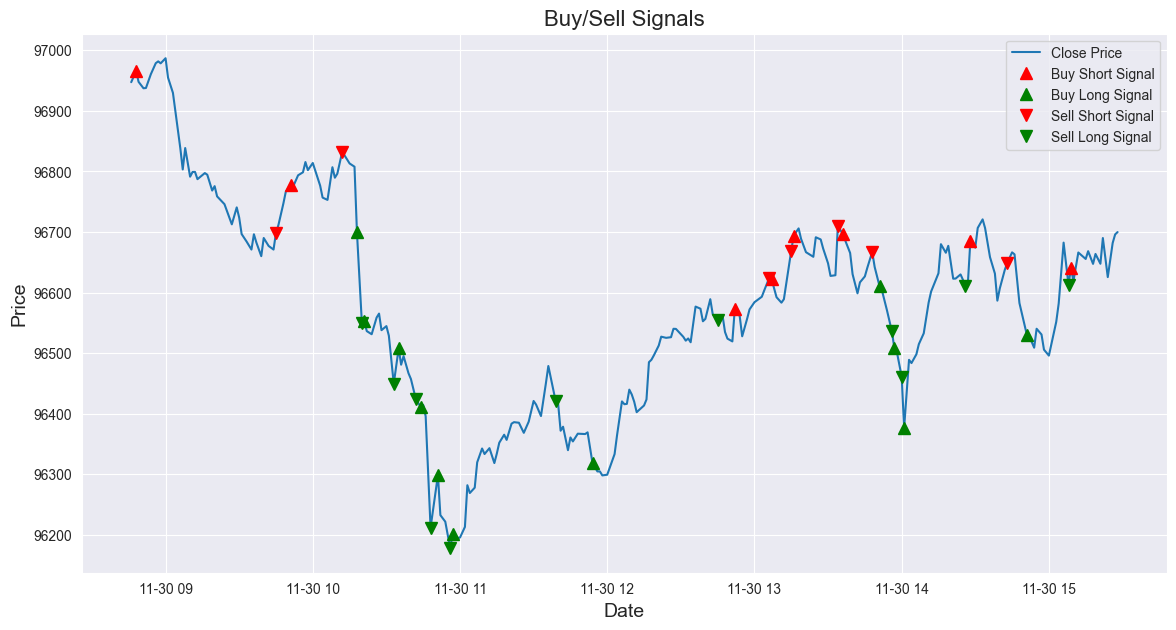

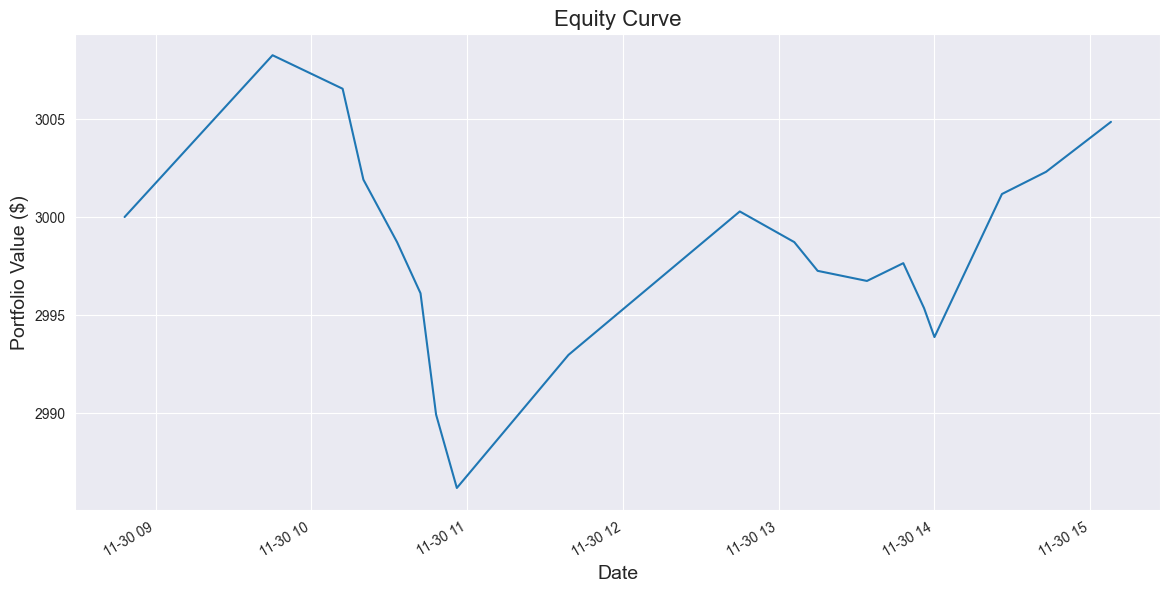

In [8]:
from software.plotter import plot_trades, plot_equity_curve

plot_trades(price_data=processed_data, transactions=transactions)
plot_equity_curve(equity_series)